In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/dimension reduction')

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import joblib
import time

from sklearn.preprocessing import MinMaxScaler

In [ ]:
reduced_sfc = np.loadtxt('reduced_sfc.csv', delimiter=',')
pca_compress = joblib.load('pod_coefficients_full.pkl') 
W = joblib.load('output_files/NMF_454_full.pkl') 

In [ ]:
scaler_pca = MinMaxScaler((-1, 1))
scaler_nmf = MinMaxScaler((-1, 1))
scaler_sfc = MinMaxScaler((-1, 1))

scaler_pca.fit(pca_compress)
scaler_nmf.fit(W)
scaler_sfc.fit(reduced_sfc)

norm_pca = scaler_pca.transform(pca_compress)
norm_nmf = scaler_nmf.transform(W)
norm_sfc = scaler_sfc.transform(reduced_sfc)

T-sne models the similarity of the original space as a probability density. And the distribution of similarity is given by Gaussian distribution. In short, in the original space, the similarity between a certain point and other points can be represented by a probability density distribution.

In [ ]:
def draw_tsne(features):
    '''
    This function is to pass the embedding of the features of the latent variables and its name

    input:
    features: the latent variables that will be visualised

    output:
    print the process of the t-SNE and show the plot by using matplotlib
    '''

    print(f">>> t-SNE fitting")
    # initial TSNE instance, detailed parameters settings refer to Sklearn website
    tsne = TSNE(n_components=2, init='pca', random_state=3, perplexity=30, n_iter_without_progress= 1000)
    Y = tsne.fit_transform(features)
    scaler_tne = MinMaxScaler((0, 1))
    print(f"<<< fitting over")
    norm_Y = scaler_tne.fit_transform(Y)
    plt.figure(figsize=(8, 8))
    plt.scatter(norm_Y[:, 0], norm_Y[:, 1], label = 'Real Latent Variable')
    #plt.scatter(norm_Y[-1, 0], norm_Y[-1, 1], label = 'Fabricated Latent Variable')
    leg = plt.legend(loc = 'upper right')
    plt.savefig('output_files/t-SNE-nmf.png', dpi = 200)
    print(f"t-sne done here")

    #fig, ax = plt.subplots()
    #fig.set_size_inches(21.6, 14.4)
    #plt.axis('off')
    #print(f">>> plotting images")
    #imscatter(Y[:, 0], Y[:, 1], imgs, zoom=0.1, ax=ax)
    #print(f"<<< plot over")
    ##plt.savefig(fname='figure.eps', format='eps')
    #plt.show()

>>> t-SNE fitting
<<< fitting over
t-sne done here


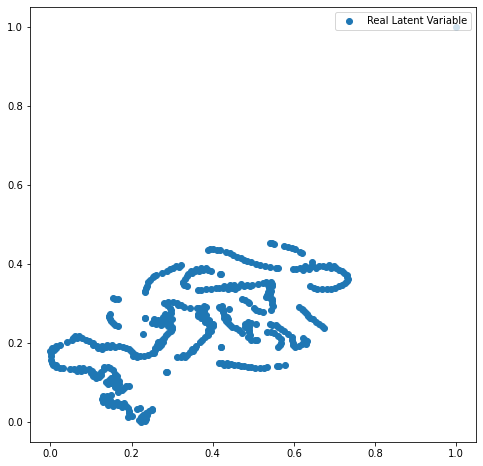

In [ ]:
draw_tsne(norm_pca)

>>> t-SNE fitting
<<< fitting over
t-sne done here


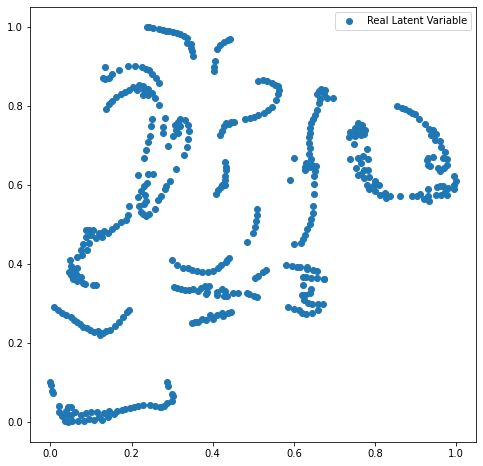

In [ ]:
draw_tsne(norm_nmf)

>>> t-SNE fitting
<<< fitting over
t-sne done here


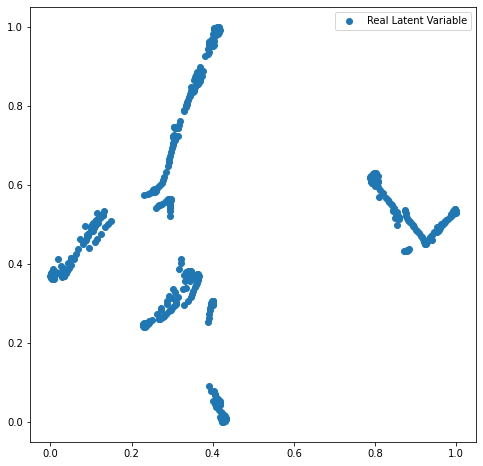

In [ ]:
draw_tsne(norm_sfc)